# ML heating/cooling and advection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
from tqdm import tqdm
import sys

# Strong Current

## SSTA and 300km-eddy adv

In [2]:
SC_MS_stats_ds = xr.open_dataset('../binned_stats_data/Strong_SSTA_eddy_adv_300km_filter_binned_statistics_2016.nc')
SC_MS_adv = SC_MS_stats_ds.eddy_adv_ml_bin_left.data
SC_MS_SSTA_mean = SC_MS_stats_ds.SSTA_mean.data
SC_MS_SSTA_std = SC_MS_stats_ds.SSTA_std.data
SC_MS_bin_population = SC_MS_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [3]:
SC_MS_SSTA_std.mean()

0.24539831465456519

## SHFLUXA and SSTA

In [4]:
SC_MS1_stats_ds = xr.open_dataset('../binned_stats_data/Strong_shfluxa_SSTA_300km_binned_statistics_2016.nc')
SC_MS1_adv = SC_MS1_stats_ds.SSTA_bin_left.data
SC_MS1_SSTA_mean = SC_MS1_stats_ds.shfluxa_mean.data
SC_MS1_SSTA_std = SC_MS1_stats_ds.shfluxa_std.data
SC_MS1_bin_population = SC_MS1_stats_ds.SSTA_bin_population.data/1e6

In [5]:
SC_MS1_SSTA_std.mean()

3.7566387601610143

## SHFLUXA and 300km-eddy adv

In [6]:
SC_MS2_stats_ds = xr.open_dataset('../binned_stats_data/Strong_shfluxa_eddy_adv_300km_binned_statistics_2016.nc')
SC_MS2_adv = SC_MS2_stats_ds.eddy_adv_ml_bin_left.data
SC_MS2_shfluxa_mean = SC_MS2_stats_ds.shfluxa_mean.data
SC_MS2_shfluxa_std = SC_MS2_stats_ds.shfluxa_std.data
SC_MS2_bin_population = SC_MS2_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [7]:
SC_MS2_shfluxa_std.mean()

8.035115411782536

# Weak Current

## SSTA and 300km-eddy adv

In [8]:
WC_MS_stats_ds = xr.open_dataset('../binned_stats_data/Weak_SSTA_eddy_adv_300km_filter_binned_statistics_2016.nc')
WC_MS_adv = WC_MS_stats_ds.eddy_adv_ml_bin_left.data
WC_MS_SSTA_mean = WC_MS_stats_ds.SSTA_mean.data
WC_MS_SSTA_std = WC_MS_stats_ds.SSTA_std.data
WC_MS_bin_population = WC_MS_stats_ds.eddy_adv_ml_bin_population.data/1e6 #unit: million

In [9]:
WC_MS_SSTA_std.mean()

0.1304748390315282

## SHFLUXA and SSTA

In [10]:
WC_MS1_stats_ds = xr.open_dataset('../binned_stats_data/Weak_shfluxa_SSTA_300km_binned_statistics_2016.nc')
WC_MS1_adv = WC_MS1_stats_ds.SSTA_bin_left.data
WC_MS1_SSTA_mean = WC_MS1_stats_ds.shfluxa_mean.data
WC_MS1_SSTA_std = WC_MS1_stats_ds.shfluxa_std.data
WC_MS1_bin_population = WC_MS1_stats_ds.SSTA_bin_population.data/1e6

In [11]:
WC_MS1_SSTA_mean[7:].mean()

3.625610357353804

## SHFLUXA and 300km-eddy adv

In [12]:
WC_MS2_stats_ds = xr.open_dataset('../binned_stats_data/Weak_shfluxa_eddy_adv_ml_300km_binned_statistics_2016.nc')
WC_MS2_adv = WC_MS2_stats_ds.eddy_adv_ml_bin_left.data
WC_MS2_shfluxa_mean = WC_MS2_stats_ds.shfluxa_mean.data
WC_MS2_shfluxa_std = WC_MS2_stats_ds.shfluxa_std.data
WC_MS2_bin_population = WC_MS2_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [13]:
WC_MS2_shfluxa_std.mean()

4.454564519605364

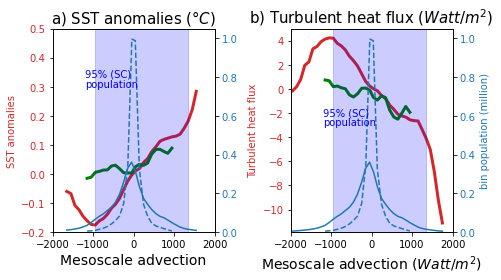

In [14]:
ymin, ymax = 0, 1.05
fig, (ax5, ax0) = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 4))

#MS-ADV-SSTA
color = 'tab:red'
ax5.set_xlabel('Mesoscale advection' , fontsize=14)
#ax5.set_ylabel('SST Anomalies ($\degreeC$)', color=color, fontsize=14)
ax5.plot(SC_MS_adv, SC_MS_SSTA_mean, color=color, linewidth = 3)
ax5.plot(WC_MS_adv , WC_MS_SSTA_mean, color='green', linewidth = 3)
ax5.tick_params(axis='y', labelcolor=color)
ax5.set_xlim([-2000, 2000])
ax5.set_ylim([-.2, .5])
ax5.set_title('a) SST anomalies ($\degree C$)', fontsize=15) #, S = ' + str(int(SC_s_mean)))
ax5.set_ylabel('SST anomalies', color=color)  # we already handled the x-label with ax1
ax6 = ax5.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax6.plot(SC_MS_adv , SC_MS_bin_population, color = color)
ax6.plot(WC_MS_adv , WC_MS_bin_population, color = color, linestyle = '--')
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_ylim([ymin, ymax])
plt.fill_between(SC_MS_adv[7:31], np.repeat(1.05, 24), 0, facecolor="orange", color='blue',alpha=0.2)         
plt.text(-1200, 0.8, '95% (SC)', color = 'blue')
plt.text(-1200, 0.75, 'population', color = 'blue')

#MS-ADV-SHFLUXA
color = 'tab:red'
ax0.set_xlabel('Mesoscale advection ($Watt/m^2$)' , fontsize=14)
#ax5.set_ylabel('SST Anomalies', color=color, fontsize=14)
ax0.plot(SC_MS2_adv, SC_MS2_shfluxa_mean, color=color, linewidth = 3)
ax0.plot(WC_MS2_adv , WC_MS2_shfluxa_mean, color='green', linewidth = 3)
ax0.tick_params(axis='y', labelcolor=color)
ax0.set_xlim([-2000, 2000])
ax0.set_ylabel('Turbulent heat flux', color=color)  # we already handled the x-label with ax1
#ax0.set_ylim([-.2, .5])
ax0.set_title('b) Turbulent heat flux ($Watt/m^2$)', fontsize=15) #, S = ' + str(int(SC_s_mean)))
ax = ax0.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax.plot(SC_MS2_adv , SC_MS2_bin_population, color = color)
ax.plot(WC_MS2_adv , WC_MS2_bin_population, color = color, linestyle = '--')
ax.tick_params(axis='y', labelcolor=color)
ax.set_ylim([ymin, ymax])
plt.fill_between(SC_MS_adv[7:31], np.repeat(1.05, 24), 0,facecolor="orange", color='blue',alpha=0.2) 
plt.text(-1200, 0.6, '95% (SC)', color = 'blue')
plt.text(-1200, 0.55, 'population', color = 'blue')
ax.set_ylabel('bin population (million)', color=color)  # we already handled the x-label with ax1

plt.tight_layout()
fig.savefig('Fig12_EDDY_SSTA_SHFLUX.png')